<center>
    <img src="CC.png" width="300" alt="Universidad Castro Carazo logo"  />
    <h1 Style='color:#14327e'>Programa Tecnico de Analisis de Datos</h1>
    <h3 Style='color:#14327e'>Curso: Introduccion a Machine Learning</h3>
    <h5 Style='color:#14327e'>Ejemplo: Regresion Lineal Simplre</h5>
</center>

<p Style='text-align: justify'> El presente ejemplo programado pretende motivar el analisis respecto a la generacion de un modelo de regresion lineal simple, para ello, continuaremos con el ejemplo del cuatrimestre anterior sobre los vehiculos, de manera que buscaremos generar una prediccion del valor de consumo de combustible un carro en funcion de la variable mas influyente para determinar su costo.
<br>
<br>
En ese sentido, este ejercicio requiere del analisis de cada una de las lineas de codigo por parte de los estudiantes, de manera que se propicie un espacio de investigacion y consultas sobre el tema bajo estudio <p/>

<h4 Style='color:#ecbd5c'>Importando las Librerias necesarias<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como es de su conocimiento las librerias periten desarrollar la funcionalidad y los codigos fuentes necesarios para la manipulacion de los datos, entre las que se abordaron el cuatrimestre anterior tenemos Pandas, Numpy, y Matplotlib.
<br>
<br>
En este ejercicio conoceremos una nueva libreria Sklearn, especificamente las funcionalidades asociadas a los modelos lineales, siendo esta el principal insumo para implementar una regresion lineal simple.
<br>
<br>
En el siguiente enlace podran consultar y leer mas sobre la libreria Sklearn, especificamente el modulo de modelos lineales.
</p>
<br>
<br>   
<table>
  <tr>
    <td> <img src="informacion1.png" alt="Enlace para consulta"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Libreria SKlearn, modelo de regresion lineal. Insumo para lectura</a></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Instruccion: Por favor proceda a realizar la lectura del enlace adjunto para un mayor entendimiento de la funcionalidad, asimismo, en caso de ser necesario proceda a realizar una indagacion adicional.</td>
  </tr>
</table>

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

<h4 Style='color:#ecbd5c'>Carga de datos para el modelo<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> El proceso de carga de datos se realizara de la misma manera en la cual se efectuo durante el curso anterior, sin embargo, previo a realizar la carga es necesario aportar la siguiente meta data.
</p>
    
<h5 Style='color:#179fa1'>Meta datos del set para analisis (FuelConsumption.csv)<h5>   
<p  Style='text-align: justify; font-style: normal; font-weight: normal'> Hemos obetnido un conjunto de datos de consumo de combustible, FuelConsumption.csv, que contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos ligeros nuevos para la venta minorista en un pais. A continuacion se identifican las variables y un ejemplo de los valores para conocer cual es el dominio de esa variable:
</p>
<img src="meta.png" alt="Meta data" width="300">

In [4]:
df = pd.read_csv("FuelConsumption.csv")

# Observemos el set de datos
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h4 Style='color:#ecbd5c'>Una exploracion rapida de los datos<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como este ejercicio se centra en el desarrollo de un modelo de regresion linea, y con el proposito de no hacerlo extenso, para su analisis. Se realizara una exploracion rapida para identifcar y conocer en la generalidad los datos disponibles en el set de datos.
<br>
<br>    
Sin embargo, esto no sustituye los pasos aprendidos durante el cuatrimestre anterior, siempre es necesario conocer y gestionar adecuadamente el set de datos para su analisis y diseno de modelos predictivos.
</p>
<br>   
<table>
  <tr>
    <td> <img src="advertencia.png" alt="IMPORTANTE"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Es importante conocer que todo trabajo de ciencia de datos debe cumplir con la metodologia aprendida en el curso de Analisis de Datos, de manera que, los pasos y procesos aprendidos durante ese curso son necesarios para un adecuado desarrollo de modelos predictivos.</td>
      <td><img src="instruccion.png" alt="CONSIDERACION"/></td>
      <td Style='text-align: justify; font-style: normal; font-weight: normal'>Para este ejemplo se omiten los pasos relacioandos con la estandarizacion, homologacion, limpieza, y graficado de datos, para centrarnos en el desarrollo del modelo de regresion lineal.</td>
  </tr>
    </table>

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como se menciono el ejercicio considete en poder predicir la cantidad de emisiones de CO2 de los vehiculos en funcion de sus caracteristicas, por esto se realiza un descarte para dejar unicamente las caracteristicas que estan relacionadas con le emision del CO2 en un vehiculo.
<br>
<br>    
En este caso, esas variables esrian Enginesize, Cylinders, FuelConsumption, Co2Emissions. particularmente las variable a predecir es CO2Emissions, y las otras variables por su relacion con la emision de CO2 en el motor de un vehiculo podrian funcionar como pariables predictoras, sin embargo hay que analizar una a una para ver su comportamiento y seleccionar la mas adecuada.
</p>

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


<p Style='text-align: justify; font-style: normal; font-weight: normal'> Ahora que hemos seleccionado las variables que estan relacionadas con la emision de CO2 en los vehiculos, ahora vamos agraficarlas para conocer su distribucion e iniciar a seleccionar la variable independiente que mejor se ajusta para una prediccion.
</p>

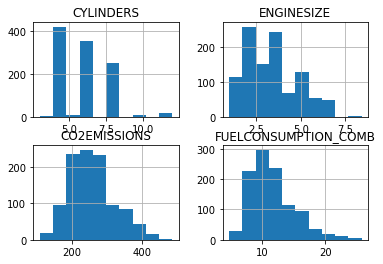

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como la visualizacion nos da una nocion pero no lo suficientemente buena de su distribucion vamos a realizar una graficacion para conocer como estan distribuidas estas variables y de esta forma seleccionar la mas adecuada para el modelo de regresion lineal.
<br>
<br>    
Para conocer esto, vamos a generar una grafica de dispercion para conocer la relacion que existe entre cada una de las variables independientes con la variable dependiente, siendo que atra ves de esto se busca una distribucion homogenea en los datos y no una ditribucion que se dibuja como una linea.
</p>

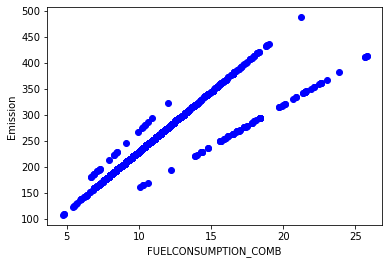

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

<table>
  <tr>
    <td> <img src="disgusto.png" alt="No Aceptado"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Como se puede apreciar la grafica dibuja lineas diagonales, esto quiere decir, que los datos contenidos en esa variable no disponen de una distribucion adecuada para disenar el modelo predictivo. Por lo tanto esta variable queda descartada como predictora.</td>
  </tr>
</table>

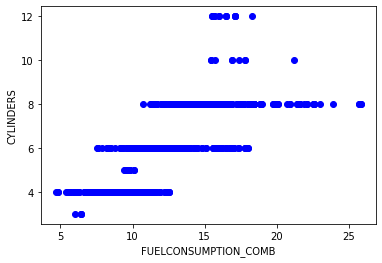

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CYLINDERS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CYLINDERS")
plt.show()

<table>
  <tr>
    <td> <img src="disgusto.png" alt="No Aceptado"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Como se puede apreciar la grafica dibuja lineas horizontales, esto quiere decir, que los datos contenidos en esa variable no disponen de una distribucion adecuada para disenar el modelo predictivo. Por lo tanto esta variable queda descartada como predictora.</td>
  </tr>
</table>

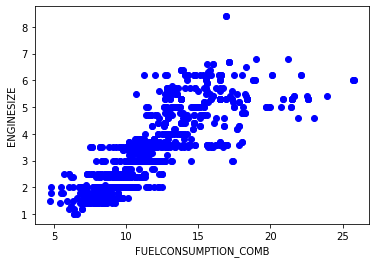

In [12]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.ENGINESIZE,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("ENGINESIZE")
plt.show()

<table>
  <tr>
    <td> <img src="bueno.png" alt="No Aceptado"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Al relacionar las varioables de ENGINESIZE y FUELCONSUMPTION_COMB, en su relacion genera la distribucion buscada, de manera que el modelo pueda conocer a traves de cada uno de los datos de los vehiculos cual podria ser el emision de CO2 en funcion del tamano del motor. por lo tanto esta variable entre las seleccionadas es la que mejor se ajusta para realizar el modelo predictivo.</td>
  </tr>
</table>

<h4 Style='color:#ecbd5c'>Preparando el modelo de regresion lineal<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> Una vez transitada la etapa de analisis de datos y seleccion de las variables a utilizar en el modelo de regresion lineal se procede con la creacion de los set de datos de entrenamiento y pruebas.
<br>
<br>    
Train/Test Split implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba que son mutuamente excluyentes. Después de lo cual, entrena con el conjunto de entrenamiento y prueba con el conjunto de prueba. Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se utilizó para entrenar el modelo. Por lo tanto, nos da una mejor comprensión de qué tan bien generaliza nuestro modelo en nuevos datos.
<br>
<br> 
Esto significa que conocemos el resultado de cada punto de datos en el conjunto de datos de prueba, ¡lo que lo hace genial para probar! Dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, es realmente una prueba fuera de muestra.
<br>
<br> 
Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. El 80 % de todo el conjunto de datos se utilizará para entrenamiento y el 20 % para pruebas. Creamos una máscara para seleccionar filas aleatorias usando la función np.random.rand():
</p>
<br>
<br>   
<table>
  <tr>
    <td> <img src="informacion1.png" alt="Enlace para consulta"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'><a href="https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/">Informacion sobre set de entrenamiento y pruebas</a></td>
    <td><img src="instruccion.png" alt="CONSIDERACION"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Instruccion: Por favor proceda a realizar la lectura del enlace adjunto para un mayor entendimiento de la funcionalidad, asimismo, en caso de ser necesario proceda a realizar una indagacion adicional.</td>
  </tr>
</table>

In [13]:
msk = np.random.rand(len(df)) < 0.8 #Esto selecciona aleatoriamente el 80% de las observaciones y la amacena en msk
train = cdf[msk] #aca se indica que el set de entrenamiento esta conformado por el 80% de las observaciones
test = cdf[~msk] #aca se especifica que el set de prueba esta conformado por el 20% de la data restante.

<p Style='text-align: justify; font-style: normal; font-weight: normal'> Ahora debemos conocer si el set de entrenamiento dispone de una distribucion en sus datos similar al ejercicio realizado con cada una de las variables predictoras. El resultado esperado es que la distribucion sea similar a la grafica anterior.
</p>

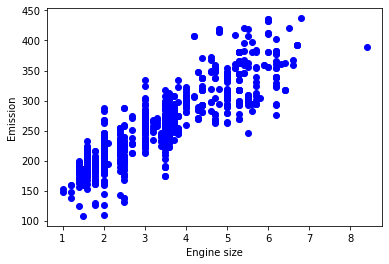

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h4 Style='color:#ecbd5c'>Generacion del modelo de Regresion Lineal<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> Con base en lo anterior, la variable seleccionada, y la division del set de datos en un set de entrenamiento (que avarca el 80% de los datos) y el set de pruebas (conformado por el 20% de los datos), se procede a crear el modelo de regresion lineal simple.
<br>
<br>    
Cabe destacar que este modelo se encuentra previamente programado dentro de la libreria Skelearn, de manera que una vez seleccionadas las variables correctas se procede a alimentar los parametros para generar las predicciones.
</p>

In [15]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# Obtener coeficientes de resultados, estos datos son informativos.
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.02569422]]
Intercept:  [125.7247146]


<p>Los **Coeficiente** e **Intersección** en la regresión lineal simple, son los parámetros de la línea de ajuste.
Dado que es una regresión lineal simple, con solo 2 parámetros, y sabiendo que los parámetros son el intercepto y la pendiente de la línea, sklearn puede estimarlos directamente a partir de nuestros datos.
<br>
<br>
Ahora vamos a proceder a graficar la linea regresora, con el proposito que se disponga de una mejor visualizacion</p>

Text(0, 0.5, 'Emission')

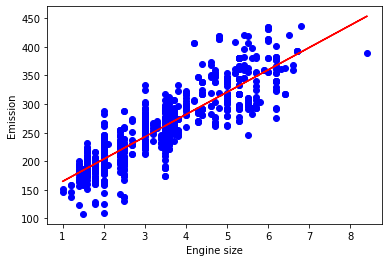

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluación
Comparamos los valores reales y los valores pronosticados para calcular la precisión de un modelo de regresión. Las métricas de evaluación desempeñan un papel clave en el desarrollo de un modelo, ya que brindan información sobre las áreas que requieren mejoras.

Hay diferentes métricas de evaluación del modelo, usemos MSE aquí para calcular la precisión de nuestro modelo en función del conjunto de prueba:

Error Absoluto Medio: Es la media del valor absoluto de los errores. Esta es la métrica más fácil de entender, ya que es solo un error promedio.

Error cuadrático medio (MSE): El error cuadrático medio (MSE) es la media del error cuadrático. Es más popular que Mean Absolute Error porque el enfoque está más orientado hacia errores grandes. Esto se debe a que el término al cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.

Error cuadrático medio (RMSE).

R-squared no es un error, sino una métrica popular para medir el rendimiento de su modelo de regresión. Representa qué tan cerca están los puntos de datos de la línea de regresión ajustada. Cuanto mayor sea el valor de R-cuadrado, mejor se ajustará el modelo a sus datos. La mejor puntuación posible es 1,0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.79
Residual sum of squares (MSE): 976.00
R2-score: 0.77


<h4 Style='color:#ecbd5c'>Visualizacion de los resultados<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> con el modelo generado, y las predicciones realizadas, se procede a crear una visualizacion de los resultados obtenidos, esto conciderando que particularmente en este caso se logran explicar el 77% de las observaciones disponibles en el set.</p>

<table>
  <tr>
    <td> <img src="informacion1.png" alt="Enlace para consulta"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'><a href="https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning-practica-con-python/">Otro ejercicio para consulta</a></td>
    <td><img src="instruccion.png" alt="CONSIDERACION"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Adicional a la revision del ejercicio complementario facilitado, se le solicita que realice una indagacion sobre las formas existentes para mostrar los resultados de las regresiones lineales simples.</td>
  </tr>
</table>

In [26]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': test_y_.flatten()})
df.head(10)

,Actual,Predicted
0,196,203.776103
1,221,219.386381
2,136,184.263256
3,232,262.314644
4,359,355.976310
5,202,203.776103
6,230,203.776103
7,224,242.801797
8,242,203.776103
9,336,289.632630


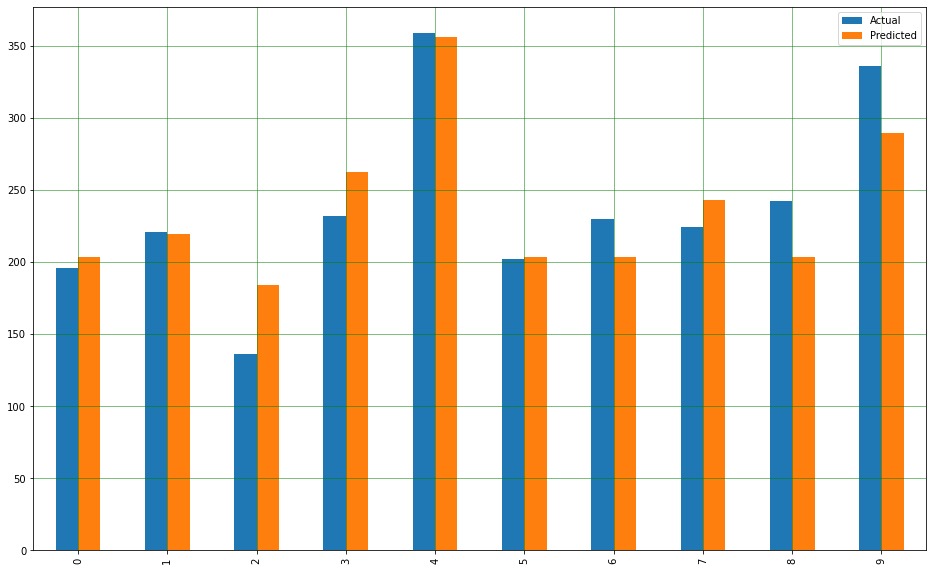

In [28]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()